<center>
<img src="http://www.bigdive.eu/wp-content/uploads/2012/05/logoBIGDIVE-01.png">
</center>

---

# Classification Models

## André Panisson

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Classification datset

In the following, we generated 50 samples from a bivariate Gaussian distribution $\mathcal{ N } ((2, 0)^T , I)$ and labeled this class
**RED**. Similarly, 50 more were drawn from $\mathcal{N} ((0, 2)^T , I)$ and labeled class **GREEN**.

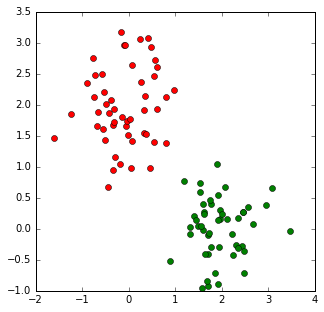

In [2]:
# 50 esempi per ogni classe, ogni classe è distribuita una su una gaussiana e l'altra sulla bivariata

np.random.seed(3)
nr_samples = 100

# Generate 100 samples from two bivariate Gaussian distributions
samples_red   = np.random.multivariate_normal(mean=(0,2), cov=np.identity(2)*0.3, size=nr_samples/2)
samples_green = np.random.multivariate_normal(mean=(2,0), cov=np.identity(2)*0.3, size=nr_samples/2)

# per modelli linearmente separabili metto quello che ho riportato sopra:
# samples_red   = np.random.multivariate_normal(mean=(0,2), cov=np.identity(2)*0.3, size=nr_samples/2)
# samples_green = np.random.multivariate_normal(mean=(2,0), cov=np.identity(2)*0.3, size=nr_samples/2)

# per modelli non linearmente separabili metto, per esempio:
# samples_red   = np.random.multivariate_normal(mean=(0,2), cov=np.identity(2)*1.5, size=nr_samples/2)
# samples_green = np.random.multivariate_normal(mean=(2,0), cov=np.identity(2)*1.5, size=nr_samples/2)
# con cov = 1.5 i due campioni si sovrappongono e quindi sono non separabili


# Join the red and green datasets as X and the class definitions as y
X = np.concatenate([samples_red, samples_green])
y = np.zeros(nr_samples, dtype=int)
y[nr_samples/2:] = 1   # da 50 a 100 assegno 1, da 51 a 100 assegno 0

# plot the red and green class points
figure(num=None, figsize=(5, 5))
plot(samples_red[:,0], samples_red[:,1], 'ro')
plot(samples_green[:,0], samples_green[:,1], 'go');

# ora metto la retta che separa le due classi, da un lato positivi, dall'altro negativi (tipo perceptron)
# dei punti rossi più vicini alla retta non son sicura della classificazione, dei lontani son più sicura

# cov = covarianza ; la cov è costante tra x e y (0.3); con questa cov ho dei dati separati
# identity = identità

In [3]:
X    # X è fatta di 2 dimensioni

array([[ 0.97967216,  2.23908629],
       [ 0.05285384,  0.97932301],
       [-0.15193178,  1.8056905 ],
       [-0.04531938,  1.65657759],
       [-0.0240002 ,  1.73861692],
       [-0.71963336,  2.48452763],
       [ 0.48271777,  2.93637173],
       [ 0.02740455,  1.77834905],
       [-0.29870595,  1.15295949],
       [ 0.5380648 ,  1.39692042],
       [-0.64907671,  1.88736091],
       [ 0.81399698,  2.12965484],
       [-0.56075022,  1.60947754],
       [ 0.34246077,  1.91208321],
       [-0.42110901,  1.87400698],
       [ 0.40808412,  3.08236045],
       [-0.68143441,  1.65689733],
       [-0.44024082,  0.67501358],
       [-0.50598173,  1.43920015],
       [ 0.61562808,  1.9277476 ],
       [-0.88911006,  2.35419873],
       [-0.19513753,  1.04524233],
       [-0.32679847,  1.67761358],
       [-0.47864505,  2.01627493],
       [-1.23142149,  1.85334079],
       [ 0.55494343,  2.46709661],
       [ 0.60697929,  2.61311551],
       [ 0.81476093,  1.38748149],
       [ 0.46328204,

In [4]:
X.shape

(100, 2)

In [5]:
# create a colormap for the points
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# X = punti che plotto
def plot_decision_boundary(model, X, plot_hyperplanes=False, plot_boundary=False):
    """
    Plots the decision boundary of a classifier.
    """
    
    # create a mesh (rete) of points that cover the full graph area
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    X_grid = np.c_[xx.ravel(), yy.ravel()]

    # use the classifier to predict the class of each mesh point
    try:
        Z = model.decision_function(X_grid)
    except:
        Z = model.predict_proba(X_grid)[:,1]-0.5
    Z = Z.reshape(xx.shape)

    figure(figsize=(8, 6))

    # plot the decision boundary
    norm = plt.cm.colors.Normalize(vmax=abs(Z).max(), vmin=-abs(Z).max())
    contourf(xx, yy, Z, 100, cmap=plt.cm.RdBu, alpha=.8, norm=norm)
    xlim(x_min, x_max)
    ylim(y_min, y_max)
    
    if plot_boundary:
        # plot the decision hyper-planes
        contour(xx, yy, Z, colors=['k'],
                linestyles=['-'],
                levels=[0])
    
    if plot_hyperplanes:
        # plot the decision hyper-planes
        contour(xx, yy, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'],
                levels=[-1., 0, 1.])

## Perceptron

The `Perceptron` is a simple algorithm suitable for large scale learning.

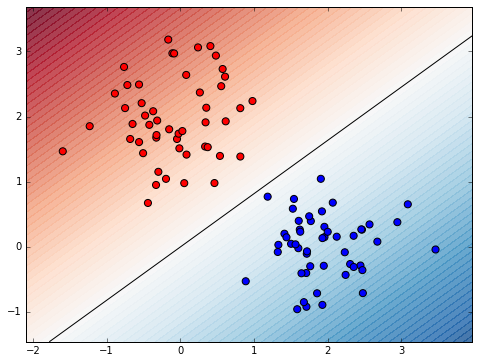

In [6]:
from sklearn import linear_model

model = linear_model.Perceptron()
model.fit(X, y)

plot_decision_boundary(model, X, plot_boundary=True)
# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# decision boundary e due aree; quanto sicuro è che un punto nell'area rossa sia rosso e nell'area blu sia blu

In [7]:
from sklearn import metrics, cross_validation

best alpha: 0.0001


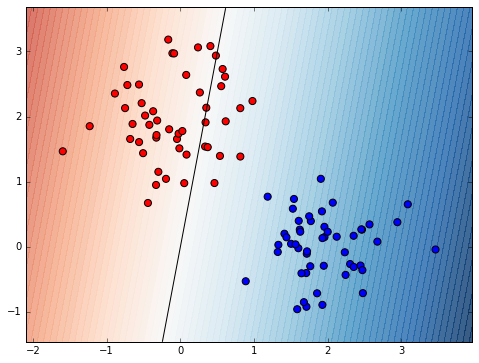

In [8]:
# nel caso di penalty l2 scelgo quale è l'alpha migliore: 

from sklearn import linear_model

model = linear_model.Perceptron(penalty='l2')

# prendo questi codici dal notebook precedente: 
alphas = np.logspace(-4, 0, 20)   # uso questi valori di regolarizzazione (da 10^-4 a 10^0)

training_scores = []
test_scores = []
r2 = metrics.r2_score

for alpha in alphas:
    model = linear_model.Perceptron(penalty='l2', alpha = alpha)
       
    scores = cross_validation.cross_val_score(model, X, y, cv=10) # cv: cross validation
    test_scores.append(np.mean(scores))

alpha = alphas[np.argmax(test_scores)]
print "best alpha:", alpha

model.fit(X, y) 

plot_decision_boundary(model, X, plot_boundary=True)
# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# crea una decision boundary che però non va bene, score troppo basso

best alpha: 0.0001


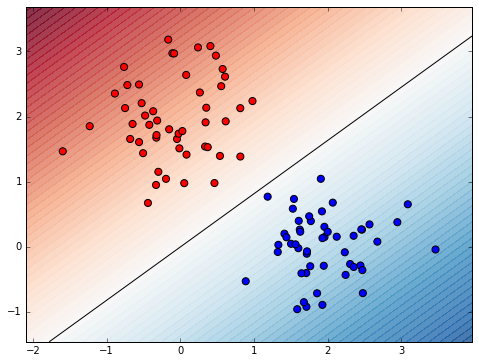

In [9]:
from sklearn import linear_model

model = linear_model.Perceptron(penalty='l2')

alphas = np.logspace(-4, 0, 20)

test_scores = []
acc = metrics.accuracy_score

for alpha in alphas:
    model = linear_model.Perceptron(penalty='l2', alpha=alpha)
    scores = cross_validation.cross_val_score(model, X, y, cv=10)
    test_scores.append(np.mean(scores))

alpha = alphas[np.argmax(test_scores)]
print "best alpha:" , alpha

model = linear_model.Perceptron(penalty='l2', alpha=alpha)
model.fit(X, y)

plot_decision_boundary(model, X, plot_boundary=True)
# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

In [10]:
model.coef_ # sono i coeff della retta (pendenza e intercetta)

array([[ 1.31802294, -1.61338184]])

In [11]:
test_scores

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.98000000000000009,
 1.0,
 0.84000000000000008,
 0.98999999999999999,
 1.0,
 0.98999999999999999,
 0.59999999999999987]

In [12]:
from sklearn import grid_search

best alpha: {'alpha': 0.0001}


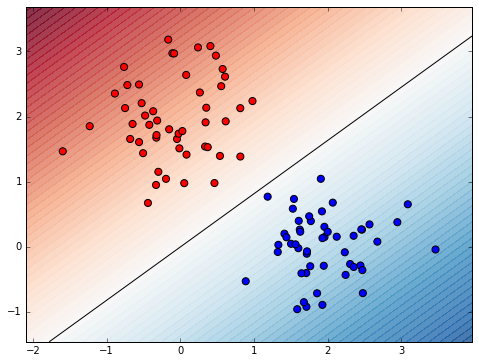

In [13]:
from sklearn import linear_model

model = linear_model.Perceptron(penalty='l2')

alphas = np.logspace(-4, 0, 20)   # uso questi valori di regolarizzazione (da 10^-4 a 10^0)

gs = grid_search.GridSearchCV(model, {'alpha': alphas}, cv=10)
gs.fit(X, y)

print "best alpha:", gs.best_params_

plot_decision_boundary(gs, X, plot_boundary=True)
# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

## Logistic regression

Logistic regression, despite its name, is a linear model for classification
rather than regression. Logistic regression is also known in the literature as
logit regression, maximum-entropy classification (MaxEnt)
or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a [logistic function](http://en.wikipedia.org/wiki/Logistic_function>).

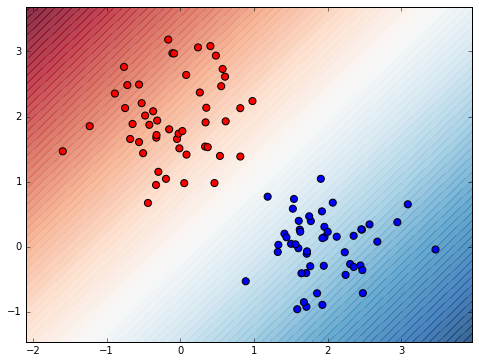

In [14]:
from sklearn import linear_model

model = linear_model.LogisticRegression()
model.fit(X, y)

plot_decision_boundary(model, X)
# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

best alpha: {'C': 0.033598182862837812}


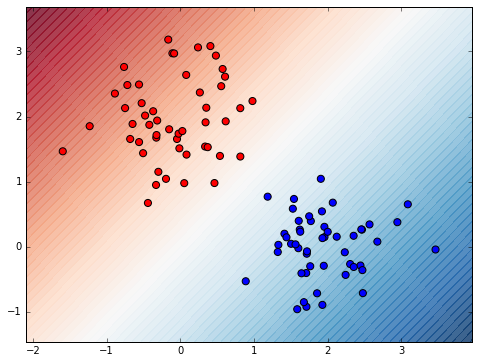

In [15]:
# fare model selection usando grid search:

from sklearn import linear_model
model = linear_model.LogisticRegression(penalty = 'l1')

Cs = np.logspace(-4, 0, 20)
gs = grid_search.GridSearchCV(model, {'C': Cs}, cv=10)
gs.fit(X, y)

print "best alpha:", gs.best_params_

plot_decision_boundary(gs, X)
# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

## Naive Bayes

Naive Bayes methods are a set of supervised learning algorithms
based on applying Bayes' theorem with the "naive" assumption of independence
between every pair of features. Given a class variable $y$ and a
dependent feature vector $x_1$ through $x_n$,
Bayes' theorem states the following relationship:

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)}
                                    {P(x_1, \dots, x_n)}$$

Using the naive independence assumption that

$$ P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y), $$

for all $i$, this relationship is simplified to

$$ P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}
                                    {P(x_1, \dots, x_n)} $$

Since $P(x_1, \dots, x_n)$ is constant given the input,
we can use the following classification rule:

$$ P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y) $$
$$   \Downarrow $$
$$   \hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y), $$

and we can use Maximum A Posteriori (MAP) estimation to estimate
$P(y)$ and $P(x_i \mid y)$;
the former is then the relative frequency of class $y$
in the training set.

The different naive Bayes classifiers differ mainly by the assumptions they
make regarding the distribution of $P(x_i \mid y)$.

In [16]:
from sklearn import naive_bayes

In [17]:
naive_bayes.MultinomialNB()   # è un tipo di modello (il Multinomial NB, Naive Bayes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

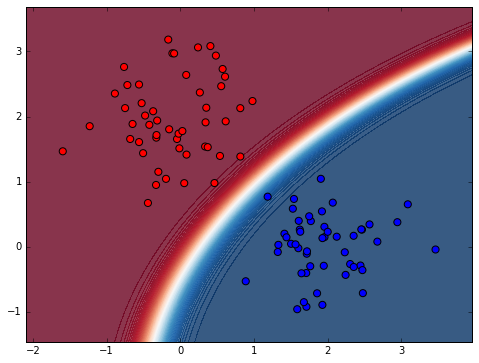

In [18]:
model = naive_bayes.GaussianNB()
model.fit(X, y)

plot_decision_boundary(model, X)
# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# come decision boundary non c'è più una retta, e il modello è più sicuro nelle zone vicino alla decision boundary
# per questo modello non si può fare model selection in quanto tra i parametri del modello naive_bayes.GaussianNB()
# non c'è nulla

In [19]:
model.class_count_

array([ 50.,  50.])

In [20]:
model.sigma_

array([[ 0.29459413,  0.38273623],
       [ 0.24608791,  0.2154006 ]])

In [21]:
model.theta_

array([[-0.09047691,  1.97147095],
       [ 1.94801515,  0.01589629]])

## Decition Trees

**Decision Trees (DTs)** are a set of supervised learning models used
for `classification <tree_classification>` and `regression`.
The goal is to create a model that predicts the value of a
target variable by learning simple decision rules inferred from the data
features.

Some advantages of decision trees are:

    - Simple to understand and to interpret. Trees can be visualised.

    - Requires little data preparation. Other techniques often require data
      normalisation, dummy variables need to be created and blank values to
      be removed. Note however that this module does not support missing
      values.

    - The cost of using the tree (i.e., predicting data) is logarithmic in the
      number of data points used to train the tree.

    - Able to handle both numerical and categorical data. Other techniques
      are usually specialised in analysing datasets that have only one type
      of variable. See :ref:`algorithms <tree_algorithms>` for more
      information.

    - Able to handle multi-output problems.

    - Uses a white box model. If a given situation is observable in a model,
      the explanation for the condition is easily explained by boolean logic.
      By contrast, in a black box model (e.g., in an artificial neural
      network), results may be more difficult to interpret.

    - Possible to validate a model using statistical tests. That makes it
      possible to account for the reliability of the model.

    - Performs well even if its assumptions are somewhat violated by
      the true model from which the data were generated.


The disadvantages of decision trees include:

    - Decision-tree learners can create over-complex trees that do not
      generalise the data well. This is called overfitting. Mechanisms
      such as pruning (not currently supported), setting the minimum
      number of samples required at a leaf node or setting the maximum
      depth of the tree are necessary to avoid this problem.

    - Decision trees can be unstable because small variations in the
      data might result in a completely different tree being generated.
      This problem is mitigated by using decision trees within an
      ensemble.

    - The problem of learning an optimal decision tree is known to be
      NP-complete under several aspects of optimality and even for simple
      concepts. Consequently, practical decision-tree learning algorithms
      are based on heuristic algorithms such as the greedy algorithm where
      locally optimal decisions are made at each node. Such algorithms
      cannot guarantee to return the globally optimal decision tree.  This
      can be mitigated by training multiple trees in an ensemble learner,
      where the features and samples are randomly sampled with replacement.

    - There are concepts that are hard to learn because decision trees
      do not express them easily, such as XOR, parity or multiplexer problems.

    - Decision tree learners create biased trees if some classes dominate.
      It is therefore recommended to balance the dataset prior to fitting
      with the decision tree.

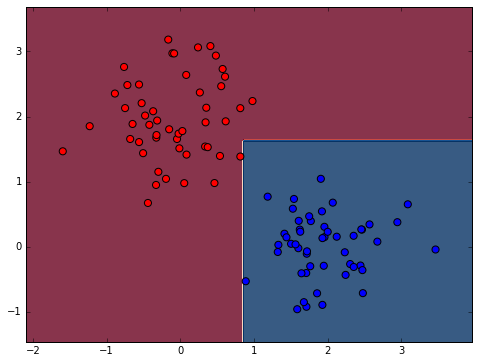

In [22]:
from sklearn import tree     # crea un albero decisionale

model = tree.DecisionTreeClassifier()
model.fit(X, y)

plot_decision_boundary(model, X)
# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

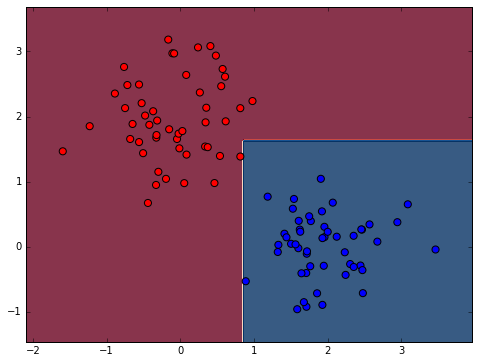

In [23]:
from sklearn import tree     # crea un albero decisionale

model = tree.DecisionTreeClassifier(max_depth=4, criterion='entropy')#è la massima profondità dei nodi, si ferma a 4
model.fit(X, y)

plot_decision_boundary(model, X)
# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# il bias di questo tipo di modelli è basso
# infatti qui l'errore in sample è 0, non ci sono rossi che cadono nel blu oppure blu che cadono nei rossi
# il problema semmai è che overfitta sempre, quindi devo aggiungere restrizioni

best params: {'max_depth': 1}


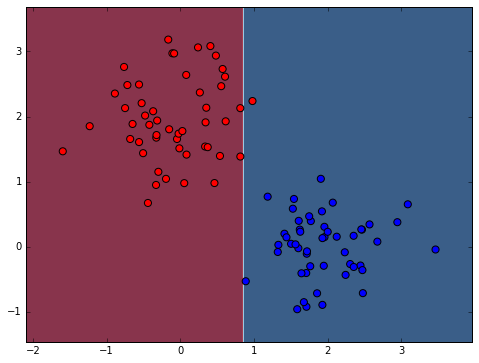

In [24]:
# ESERCIZIO: per questo dataset, quale è la max depth che generalizza meglio?:

from sklearn import tree     # crea un albero decisionale

model = tree.DecisionTreeClassifier(criterion='entropy', random_state=1) 
gs = grid_search.GridSearchCV(model, {'max_depth': [1,2,3,4,5]}, cv=20)
# gs = grid_search.GridSearchCV(model, {'max_depth': arange(1:20)}, cv=20)
gs.fit(X, y)

print "best params:", gs.best_params_

plot_decision_boundary(gs, X)
# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

best params: {'max_depth': 1}


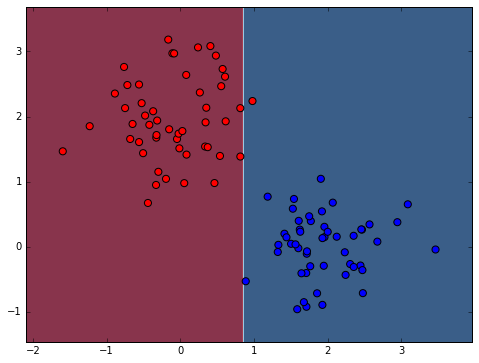

In [25]:
from sklearn import tree

model = tree.DecisionTreeClassifier(criterion='entropy', random_state=1)
gs = grid_search.GridSearchCV(model, {'max_depth': arange(1,20)}, cv=20)
gs.fit(X, y)

print "best params:" , gs.best_params_

plot_decision_boundary(gs, X)
# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

## Support Vector Machines

**Support vector machines (SVMs)** are a set of supervised learning
models used mainly for `classification`, but it can be used also for `regression`.

The advantages of support vector machines are:

    - Effective in high dimensional spaces.

    - Still effective in cases where number of dimensions is greater
      than the number of samples.

    - Uses a subset of training points in the decision function (called
      support vectors), so it is also memory efficient.

    - Versatile: different `svm_kernels` can be
      specified for the decision function. Common kernels are
      provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

    - If the number of features is much greater than the number of
      samples, the method is likely to give poor performances.

    - SVMs do not directly provide probability estimates, these are
      calculated using an expensive five-fold cross-validation.

A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier.

For a linear SVM classifier, the parameter **C** controls the penalty of the error term for a soft-margin SVM classifier. Setting **C** to a high value means that the classifier will try to maximize the margin with a high penalty for misclassified points.

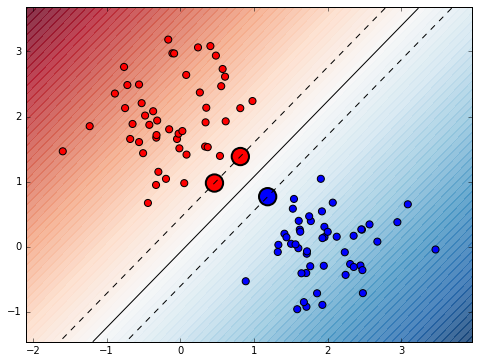

In [26]:
from sklearn import svm

model = svm.SVC(kernel='linear', C=10.) # SVC = support vector classified
model.fit(X, y)

plot_decision_boundary(model, X, plot_hyperplanes=True)

# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# plot the support vectors
SV = model.support_vectors_
scatter(SV[:, 0], SV[:, 1], c=y[model.support_],
        cmap=cm_bright, s=300, marker='o', facecolors='none', linewidths=2.);

# trova la retta con la massimale distanza tra le due rette
# con i soli tre punti grandi riesco a creare il modello
# support vector sono punti che prendo, come questi 3 grandi
# c'è una funzione di SV che serve per trovare i 3 punti

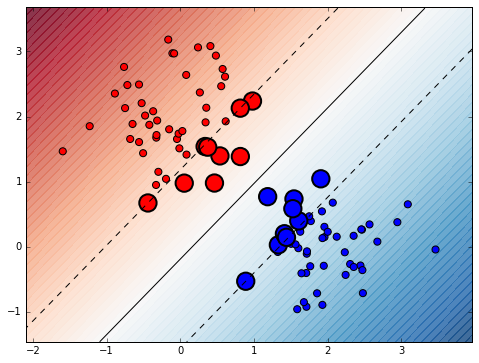

In [27]:
from sklearn import svm

model = svm.SVC(kernel='linear', C=0.1) # SVC = support vector classified, 
# con C piccolo ho punti non chiari tra i due modelli
# C piccolo: più support vector e più parametri nel modello

model.fit(X, y)

plot_decision_boundary(model, X, plot_hyperplanes=True)

# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# plot the support vectors
SV = model.support_vectors_
scatter(SV[:, 0], SV[:, 1], c=y[model.support_],
        cmap=cm_bright, s=300, marker='o', facecolors='none', linewidths=2.);

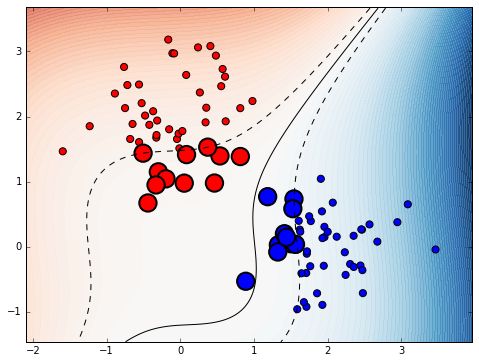

In [28]:
# POLINOMIALE:
from sklearn import svm

model = svm.SVC(kernel='poly', C=0.1) # SVC = support vector classified, 
# con C piccolo ho punti non chiari tra i due modelli
# C piccolo: più support vector e più parametri nel modello

model.fit(X, y)

plot_decision_boundary(model, X, plot_hyperplanes=True)

# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# plot the support vectors
SV = model.support_vectors_
scatter(SV[:, 0], SV[:, 1], c=y[model.support_],
        cmap=cm_bright, s=300, marker='o', facecolors='none', linewidths=2.);

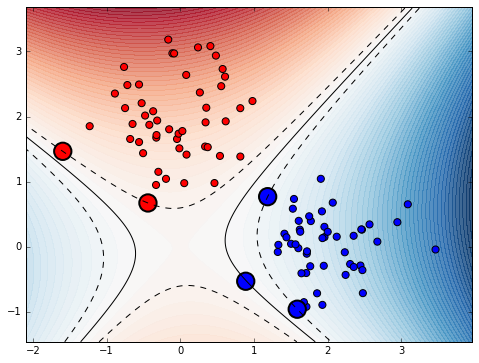

In [29]:
model = svm.SVC(kernel='poly', degree=2, C=10.)
model.fit(X, y)

plot_decision_boundary(model, X, plot_hyperplanes=True)

# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# plot the support vectors
SV = model.support_vectors_
scatter(SV[:, 0], SV[:, 1], c=y[model.support_],
        cmap=cm_bright, s=300, marker='o', facecolors='none', linewidths=2.);

# la decision boundary è un piano di secondo grado
# poi farlo con grado 10:
# model = svm.SVC(kernel='poly', degree=10, C=10.)   # decision boundary più complessa

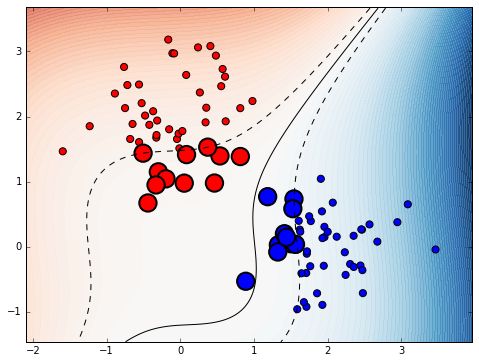

In [30]:
model = svm.SVC(kernel='poly', degree=3, C=0.1)
model.fit(X, y)

plot_decision_boundary(model, X, plot_hyperplanes=True)

# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# plot the support vectors
SV = model.support_vectors_
scatter(SV[:, 0], SV[:, 1], c=y[model.support_],
        cmap=cm_bright, s=300, marker='o', facecolors='none', linewidths=2.);

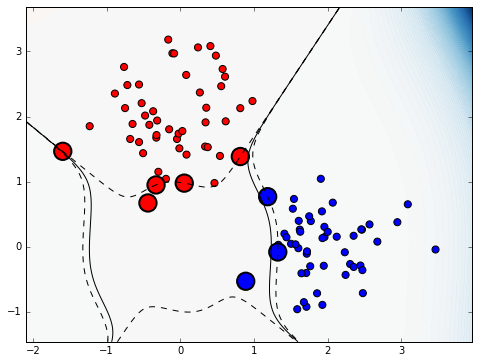

In [31]:
# polinomio di grado 10       # decision boundary più complessa

model = svm.SVC(kernel='poly', degree=10, C=10.)
model.fit(X, y)

plot_decision_boundary(model, X, plot_hyperplanes=True)

# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# plot the support vectors
SV = model.support_vectors_
scatter(SV[:, 0], SV[:, 1], c=y[model.support_],
        cmap=cm_bright, s=300, marker='o', facecolors='none', linewidths=2.);

# la decision boundary è un piano di decimo grado

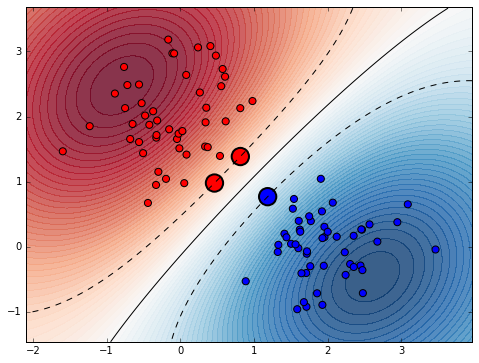

In [32]:
model = svm.SVC(kernel='rbf', gamma=1e-1, C=100.)
model.fit(X, y)

# gamma piccolo = gaussiane larghe 
# gamma alto = gaussiane che si restringono, più punti sono scelti come support vector e ho una curva più complessa

plot_decision_boundary(model, X, plot_hyperplanes=True)

# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# plot the support vectors
SV = model.support_vectors_
scatter(SV[:, 0], SV[:, 1], c=y[model.support_],
        cmap=cm_bright, s=300, marker='o', facecolors='none', linewidths=2.);

# ho due gaussiane separate dalla retta; la gaussiana dei rossi e la gaussiana dei blu

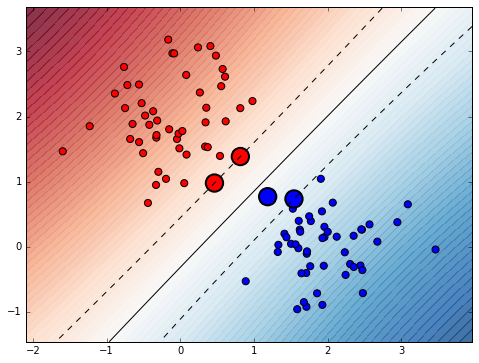

In [33]:
model = svm.SVC(kernel='rbf', gamma=1e-2, C=100.)
model.fit(X, y)

# gamma piccolo = gaussiane larghe 
# gamma alto = gaussiane che si restringono, più punti sono scelti come support vector e ho una curva più complessa

plot_decision_boundary(model, X, plot_hyperplanes=True)

# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# plot the support vectors
SV = model.support_vectors_
scatter(SV[:, 0], SV[:, 1], c=y[model.support_],
        cmap=cm_bright, s=300, marker='o', facecolors='none', linewidths=2.);

# ho due gaussiane separate dalla retta; la gaussiana dei rossi e la gaussiana dei blu

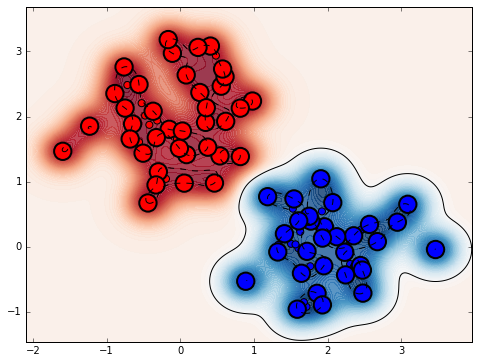

In [34]:
# GAMMA ALTO:
model = svm.SVC(kernel='rbf', gamma=10, C=100.)
model.fit(X, y)

# gamma piccolo = gaussiane larghe 
# gamma alto = gaussiane che si restringono

plot_decision_boundary(model, X, plot_hyperplanes=True)

# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# plot the support vectors
SV = model.support_vectors_
scatter(SV[:, 0], SV[:, 1], c=y[model.support_],
        cmap=cm_bright, s=300, marker='o', facecolors='none', linewidths=2.);

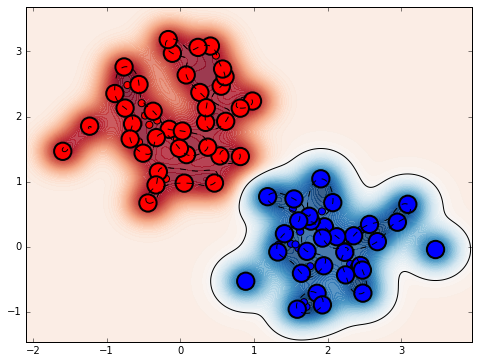

In [35]:
model = svm.SVC(kernel='rbf', gamma=10., C=1.)
model.fit(X, y)

plot_decision_boundary(model, X, plot_hyperplanes=True)

# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# plot the support vectors
SV = model.support_vectors_
scatter(SV[:, 0], SV[:, 1], c=y[model.support_],
        cmap=cm_bright, s=300, marker='o', facecolors='none', linewidths=2.);

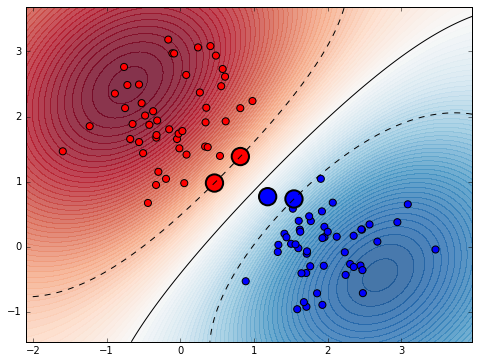

In [36]:
model = svm.SVC(kernel='rbf', gamma=0.1, C=10.)
model.fit(X, y)

plot_decision_boundary(model, X, plot_hyperplanes=True)

# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# plot the support vectors
SV = model.support_vectors_
scatter(SV[:, 0], SV[:, 1], c=y[model.support_],
        cmap=cm_bright, s=300, marker='o', facecolors='none', linewidths=2.);

best params: {'C': 0.0001, 'gamma': 1.0000000000000001e-05}


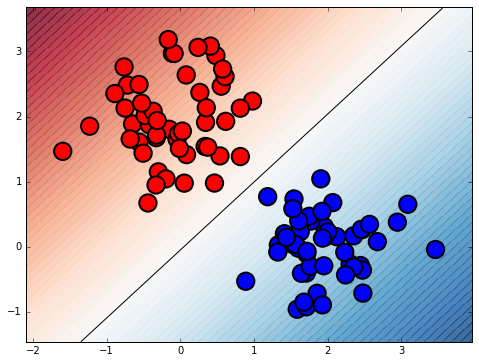

In [37]:
# ESERCIZIO: trovare gamma e C che massimizzano il support vector:

model = svm.SVC(kernel='rbf', gamma=10., C=1.)
gs = grid_search.GridSearchCV(model, {'gamma': np.logspace(-5,0,10),
                              'C': np.logspace(-4,2,10)}, cv=20)

gs.fit(X, y)

plot_decision_boundary(gs, X, plot_hyperplanes=True)


print "best params:", gs.best_params_


# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# plot the support vectors
SV = gs.best_estimator_.support_vectors_
scatter(SV[:, 0], SV[:, 1], c=y[gs.best_estimator_.support_],
        cmap=cm_bright, s=300, marker='o', facecolors='none', linewidths=2.);

In [38]:
SV.shape

(100, 2)

## Ensemble Methods: Random Forests

The goal of **ensemble methods** is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

In **random forests**, each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. In addition, when splitting a node during the construction of the tree, the split that is chosen is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features. As a result of this randomness, **the bias of the forest usually slightly increases** (with respect to the bias of a single non-random tree) but, due to averaging, **its variance also decreases**, usually more than compensating for the increase in bias, hence yielding an overall better model.

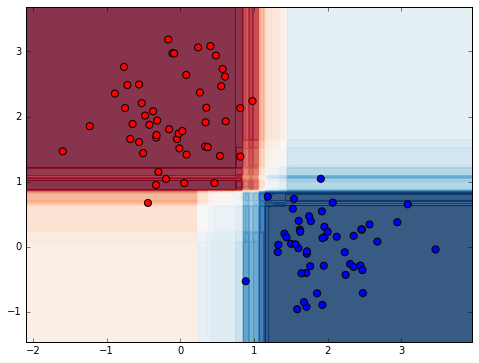

In [39]:
from sklearn import ensemble 
# creo tanti alberi in cui ogni albero viene fittato solo su una parte dei dati: 
# più alberi uso, più diminuisce la varianza

# n_estimator è il numero di alberi

model = ensemble.RandomForestClassifier(n_estimators=200, random_state=0)
# model = ensemble.RandomForestClassifier(n_estimators=1000, random_state=0)
model.fit(X, y)

plot_decision_boundary(model, X)

# plot the dataset points
scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, s=50)

# per le aree bianche ho 100 alberi che decidono per il rosso e 100 per il blu
# per le aree rosse ho solo rossi, per le blu ho solo blu
# più alberi ho, più generalizzo

In [40]:
model.feature_importances_

# qui ho che entrambe le features sono importanti per prendere una decisione
#è quante volte la feature 1 è stata usata per prendere una decisione, la feature 2 usata per prendere una decisione

array([ 0.47200882,  0.52799118])

# Exercise

Find the best model to classify the digits dataset.

Use a 10-fold cross-validation for the model selection phase.

In [63]:
cross_validation.train_test_split(X, y, test_size=0.3)

[array([[  0.,   0.,   4., ...,   1.,   0.,   0.],
        [  0.,   0.,   0., ...,  14.,   4.,   0.],
        [  0.,   1.,  13., ...,  16.,  16.,   0.],
        ..., 
        [  0.,   1.,   5., ...,   5.,   0.,   0.],
        [  0.,   0.,   3., ...,   0.,   0.,   0.],
        [  0.,   1.,   9., ...,   1.,   0.,   0.]]),
 array([[  0.,   0.,  12., ...,   8.,   0.,   0.],
        [  0.,   0.,   7., ...,   5.,   0.,   0.],
        [  0.,   1.,  13., ...,   1.,   0.,   0.],
        ..., 
        [  0.,   0.,   0., ...,   2.,   0.,   0.],
        [  0.,   0.,   2., ...,  14.,   4.,   0.],
        [  0.,   0.,   2., ...,   1.,   0.,   0.]]),
 array([0, 6, 2, ..., 3, 7, 5]),
 array([5, 3, 5, 9, 9, 0, 3, 7, 9, 9, 5, 5, 4, 8, 4, 5, 9, 5, 2, 7, 8, 5, 8,
        6, 2, 6, 6, 5, 5, 6, 6, 9, 2, 3, 2, 2, 3, 2, 9, 3, 8, 4, 0, 6, 4, 9,
        9, 2, 6, 1, 5, 1, 3, 5, 2, 6, 8, 0, 8, 8, 4, 4, 6, 9, 0, 6, 9, 1, 5,
        2, 6, 4, 8, 5, 6, 5, 0, 0, 7, 1, 3, 1, 6, 2, 9, 0, 2, 3, 7, 4, 1, 8,
        4, 9, 6

In [64]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

In [65]:
X_train.shape

(1257, 64)

In [66]:
X_test.shape

(540, 64)

In [68]:
from sklearn import datasets

digits = datasets.load_digits()

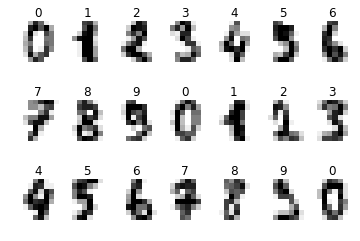

In [69]:
# plot the first 21 samples
for index, (image, label) in enumerate(zip(digits.images, digits.target)[:21]):
    plt.subplot(3, 7, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

In [70]:
X = digits.data
y = digits.target

In [71]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

In [72]:
X_train.shape

(1257, 64)

In [73]:
X_test.shape

(540, 64)

In [74]:
X # 1797 = margini, 64 = pixel

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [75]:
X.shape

(1797, 64)

In [76]:
X[0]  # pixel del primo, i numeri in realtà sono colori

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [77]:
y # target

array([0, 1, 2, ..., 8, 9, 8])

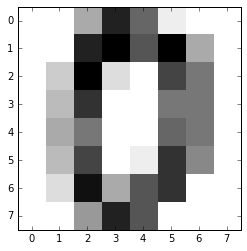

In [78]:
plt.imshow(X[0].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

In [79]:
# ESERCIZIO: provare SV con kernel rbf:

model = svm.SVC(kernel='rbf')
gs = grid_search.GridSearchCV(model, {'gamma': np.logspace(-4,0,10)}, cv=10)

gs.fit(X_train, y_train)


print "best params:", gs.best_params_

best params: {'gamma': 0.00077426368268112698}


In [80]:
gs.best_score_

0.98965791567223549

In [81]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [82]:
y_pred = gs.predict(X_test)

In [83]:
metrics.accuracy_score(y_test, y_pred)

0.98703703703703705

In [84]:
metrics.confusion_matrix(y_test, y_pred)
# un 9 è stato classificato come 3: vedi matrice sotto (e un 5 che è stato classificao come 9)

array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 58,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 56,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 62,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 49,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 50,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 56,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  1,  0, 48]])

In [85]:
# rifaccio l'esercizio con train: X_train (vedi inizio del capitolo)

gs = grid_search.GridSearchCV(model, {'gamma': np.logspace(-4,0,10)}, cv=10)

gs.fit(X_train, y_train)


print "best params:", gs.best_params_

best params: {'gamma': 0.00077426368268112698}


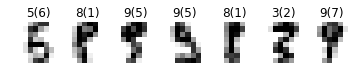

In [86]:
errors = np.where(y_test != y_pred)
for index, (image, label) in enumerate(zip(X_test[errors], y_test[errors])[:21]):
    image = image.reshape(8,8)
    pred = y_pred[np.where(y_test != y_pred)][index]
    plt.subplot(3, 7, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('%i(%i)' % (label, pred))